# Import Required Libraries
Import necessary libraries such as pandas, numpy, matplotlib, seaborn, and scikit-learn.

In [15]:
# Import Required Libraries

import pandas as pd  # For data manipulation and analysis
import numpy as np  # For numerical operations
import matplotlib.pyplot as plt  # For data visualization
import seaborn as sns  # For statistical data visualization
from sklearn.model_selection import train_test_split  # For splitting data into training and testing sets
from sklearn.preprocessing import StandardScaler  # For feature scaling
from sklearn.cluster import KMeans  # For clustering
from sklearn.metrics import davies_bouldin_score  # For evaluating clustering quality

# Load the Dataset
Load Customers.csv, Products.csv, and Transactions.csv into pandas DataFrames.

In [16]:
# Load the Dataset

# Load Customers.csv into a DataFrame
customers_df = pd.read_csv('Customers.csv')

# Load Products.csv into a DataFrame
products_df = pd.read_csv('Products.csv')

# Load Transactions.csv into a DataFrame
transactions_df = pd.read_csv('Transactions.csv')

# Display the first few rows of each DataFrame to verify the data
print(customers_df.head())
print(products_df.head())
print(transactions_df.head())

  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3       

# Data Preprocessing
Handle missing values, data type conversions, and any necessary data cleaning steps.

In [17]:
# Data Preprocessing

# Handle missing values
customers_df.fillna({'CustomerName': 'Unknown', 'Region': 'Unknown'}, inplace=True)
products_df.fillna({'ProductName': 'Unknown', 'Category': 'Unknown', 'Price': 0}, inplace=True)
transactions_df.fillna({'Quantity': 0, 'TotalValue': 0, 'Price': 0}, inplace=True)

# Convert data types
customers_df['SignupDate'] = pd.to_datetime(customers_df['SignupDate'])
transactions_df['TransactionDate'] = pd.to_datetime(transactions_df['TransactionDate'])
products_df['Price'] = products_df['Price'].astype(float)
transactions_df['Price'] = transactions_df['Price'].astype(float)
transactions_df['TotalValue'] = transactions_df['TotalValue'].astype(float)
transactions_df['Quantity'] = transactions_df['Quantity'].astype(int)

# Verify data types
print(customers_df.dtypes)
print(products_df.dtypes)
print(transactions_df.dtypes)

# Additional data cleaning steps if necessary
# For example, removing duplicates
customers_df.drop_duplicates(subset='CustomerID', keep='first', inplace=True)
products_df.drop_duplicates(subset='ProductID', keep='first', inplace=True)
transactions_df.drop_duplicates(subset='TransactionID', keep='first', inplace=True)

# Display the first few rows of each DataFrame after preprocessing
print(customers_df.head())
print(products_df.head())
print(transactions_df.head())
print('Transactions')
print(transactions_df.columns)

CustomerID              object
CustomerName            object
Region                  object
SignupDate      datetime64[ns]
dtype: object
ProductID       object
ProductName     object
Category        object
Price          float64
dtype: object
TransactionID              object
CustomerID                 object
ProductID                  object
TransactionDate    datetime64[ns]
Quantity                    int64
TotalValue                float64
Price                     float64
dtype: object
  CustomerID        CustomerName         Region SignupDate
0      C0001    Lawrence Carroll  South America 2022-07-10
1      C0002      Elizabeth Lutz           Asia 2022-02-13
2      C0003      Michael Rivera  South America 2024-03-07
3      C0004  Kathleen Rodriguez  South America 2022-10-09
4      C0005         Laura Weber           Asia 2022-08-15
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwat

# Exploratory Data Analysis (EDA)
Perform EDA on the dataset to understand the data distribution and relationships.

       CustomerID      CustomerName         Region           SignupDate
count         200               200            200                  200
unique        200               200              4                  NaN
top         C0001  Lawrence Carroll  South America                  NaN
freq            1                 1             59                  NaN
mean          NaN               NaN            NaN  2023-07-19 08:31:12
min           NaN               NaN            NaN  2022-01-22 00:00:00
25%           NaN               NaN            NaN  2022-09-26 12:00:00
50%           NaN               NaN            NaN  2023-08-31 12:00:00
75%           NaN               NaN            NaN  2024-04-12 12:00:00
max           NaN               NaN            NaN  2024-12-28 00:00:00
       ProductID            ProductName Category       Price
count        100                    100      100  100.000000
unique       100                     66        4         NaN
top         P001  ActiveW

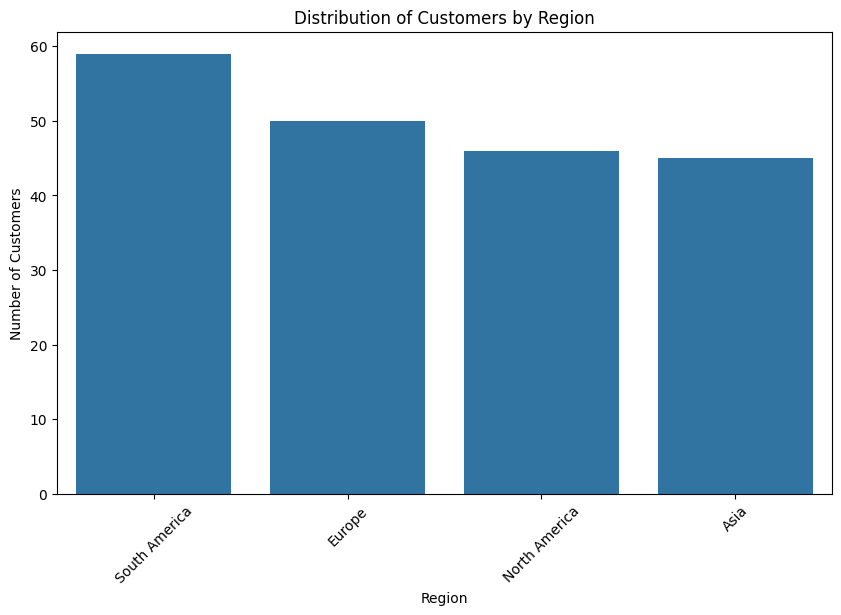

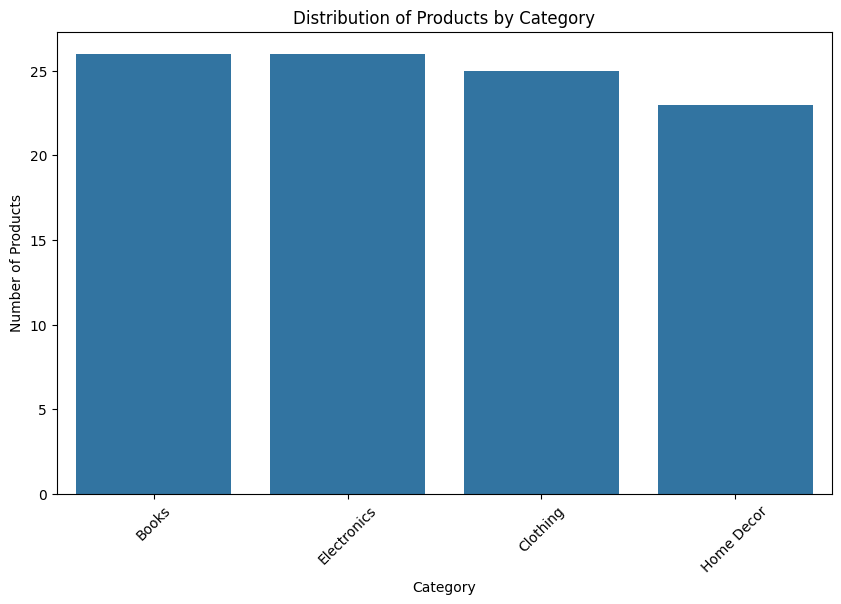

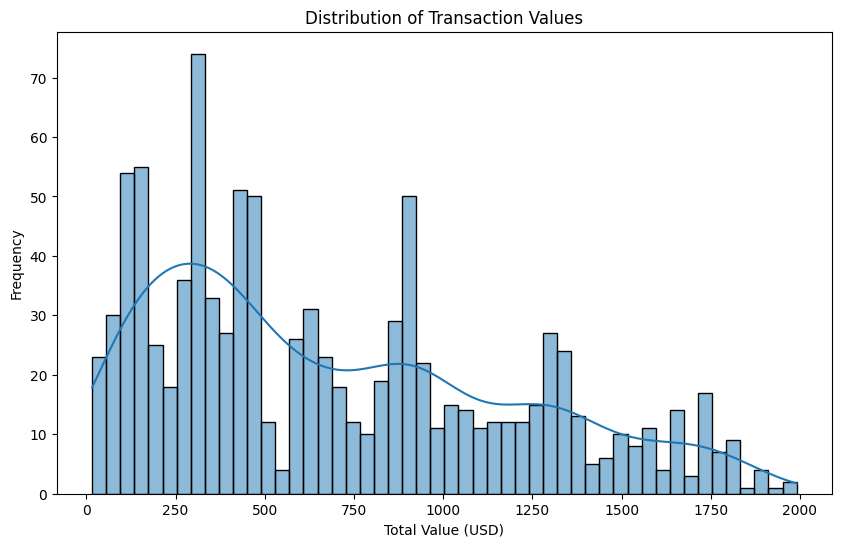

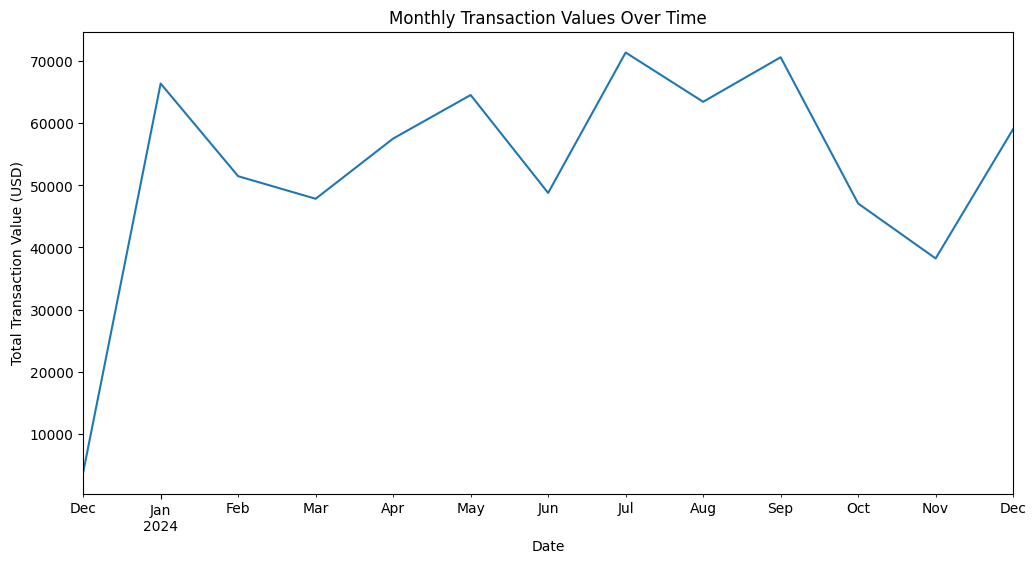

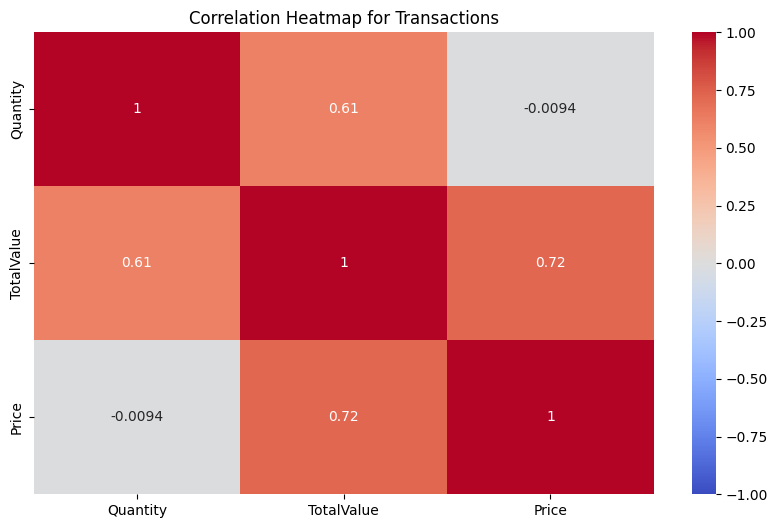

  TransactionID CustomerID ProductID  Quantity  TotalValue  Price_x  \
0        T00001      C0199      P067         1      300.68   300.68   
1        T00112      C0146      P067         1      300.68   300.68   
2        T00166      C0127      P067         1      300.68   300.68   
3        T00272      C0087      P067         2      601.36   300.68   
4        T00363      C0070      P067         3      902.04   300.68   

      CustomerName         Region SignupDate                      ProductName  \
0   Andrea Jenkins         Europe 2022-12-03  ComfortLiving Bluetooth Speaker   
1  Brittany Harvey           Asia 2024-09-04  ComfortLiving Bluetooth Speaker   
2  Kathryn Stevens         Europe 2024-04-04  ComfortLiving Bluetooth Speaker   
3  Travis Campbell  South America 2024-04-11  ComfortLiving Bluetooth Speaker   
4    Timothy Perez         Europe 2022-03-15  ComfortLiving Bluetooth Speaker   

      Category  Price_y  
0  Electronics   300.68  
1  Electronics   300.68  
2  Elect

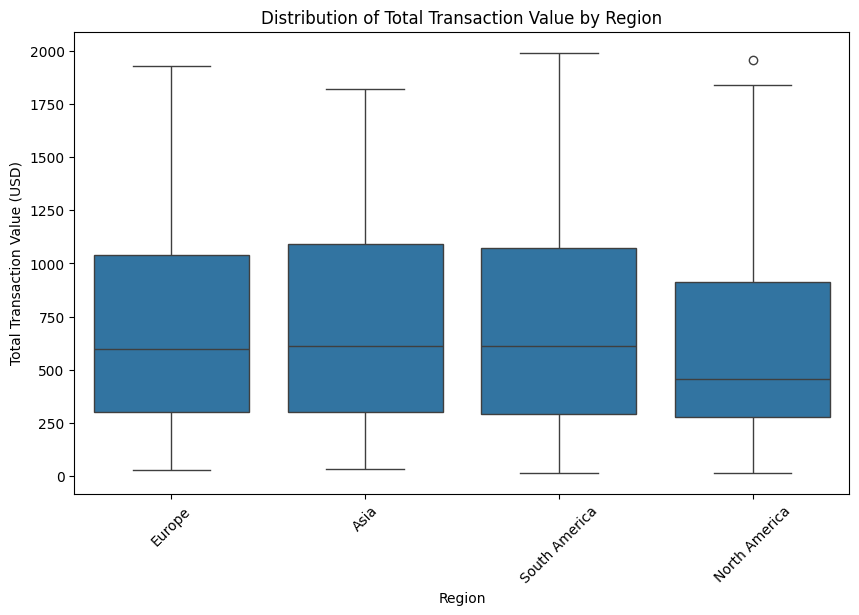

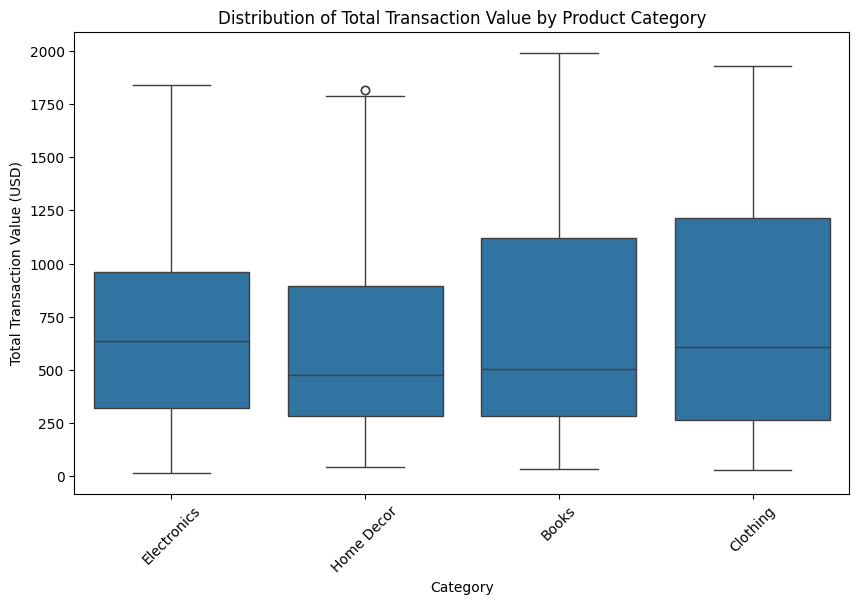

CustomerID
C0141    10673.87
C0054     8040.39
C0065     7663.70
C0156     7634.45
C0082     7572.91
C0188     7111.32
C0059     7073.28
C0028     6819.57
C0099     6715.72
C0165     6708.10
Name: TotalValue, dtype: float64
ProductID
P029    19513.80
P079    17946.91
P048    17905.20
P020    15060.92
P062    14592.24
P059    13947.20
P039    13778.88
P083    13671.60
P019    13487.95
P041    13232.12
Name: TotalValue, dtype: float64


In [18]:
# Exploratory Data Analysis (EDA)

# Summary statistics for each DataFrame
print(customers_df.describe(include='all'))
print(products_df.describe(include='all'))
print(transactions_df.describe(include='all'))
print('Transactions')
print(transactions_df.columns)

# Distribution of customers by region
plt.figure(figsize=(10, 6))
sns.countplot(data=customers_df, x='Region', order=customers_df['Region'].value_counts().index)
plt.title('Distribution of Customers by Region')
plt.xlabel('Region')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.show()

# Distribution of products by category
plt.figure(figsize=(10, 6))
sns.countplot(data=products_df, x='Category', order=products_df['Category'].value_counts().index)
plt.title('Distribution of Products by Category')
plt.xlabel('Category')
plt.ylabel('Number of Products')
plt.xticks(rotation=45)
plt.show()


# Distribution of transaction values
plt.figure(figsize=(10, 6))
sns.histplot(transactions_df['TotalValue'], bins=50, kde=True)
plt.title('Distribution of Transaction Values')
plt.xlabel('Total Value (USD)')
plt.ylabel('Frequency')
plt.show()

# Time series analysis of transactions over time
transactions_df.set_index('TransactionDate', inplace=True)
transactions_df.resample('M').sum()['TotalValue'].plot(figsize=(12, 6))
plt.title('Monthly Transaction Values Over Time')
plt.xlabel('Date')
plt.ylabel('Total Transaction Value (USD)')
plt.show()

# Correlation heatmap for numerical features in transactions
plt.figure(figsize=(10, 6))
numeric_columns = transactions_df.select_dtypes(include=[np.number])
sns.heatmap(numeric_columns .corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap for Transactions')
plt.show()

# Merge datasets for further analysis
merged_df = transactions_df.merge(customers_df, on='CustomerID').merge(products_df, on='ProductID')

# Display the first few rows of the merged DataFrame
print(merged_df.head())

# Distribution of total transaction value by region
plt.figure(figsize=(10, 6))
sns.boxplot(data=merged_df, x='Region', y='TotalValue')
plt.title('Distribution of Total Transaction Value by Region')
plt.xlabel('Region')
plt.ylabel('Total Transaction Value (USD)')
plt.xticks(rotation=45)
plt.show()

# Distribution of total transaction value by product category
plt.figure(figsize=(10, 6))
sns.boxplot(data=merged_df, x='Category', y='TotalValue')
plt.title('Distribution of Total Transaction Value by Product Category')
plt.xlabel('Category')
plt.ylabel('Total Transaction Value (USD)')
plt.xticks(rotation=45)
plt.show()

# Top 10 customers by total transaction value
top_customers = merged_df.groupby('CustomerID')['TotalValue'].sum().sort_values(ascending=False).head(10)
print(top_customers)

# Top 10 products by total sales value
top_products = merged_df.groupby('ProductID')['TotalValue'].sum().sort_values(ascending=False).head(10)
print(top_products)

# Customer Analysis
Analyze customer data to understand customer demographics and behavior.

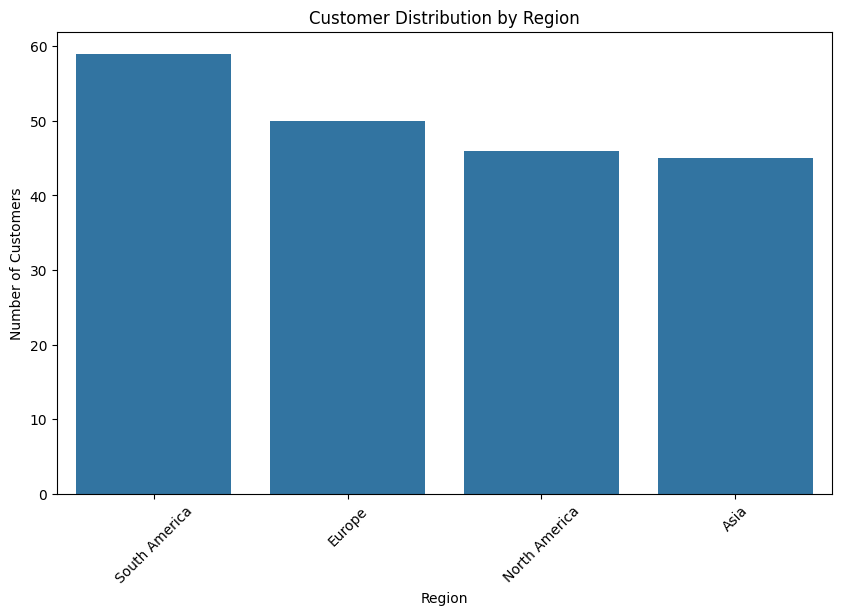

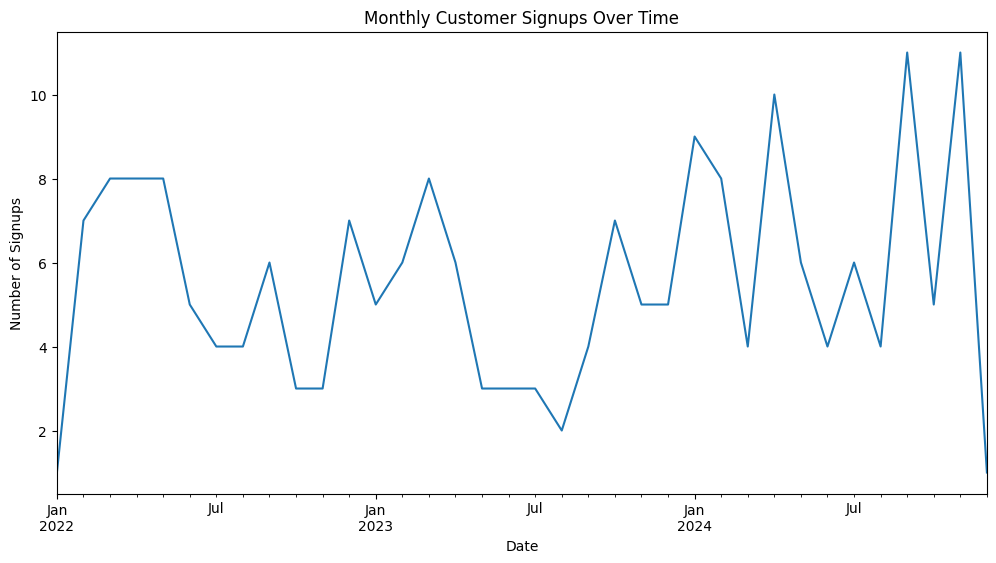

Index(['TransactionID', 'CustomerID', 'ProductID', 'Quantity', 'TotalValue',
       'Price'],
      dtype='object')


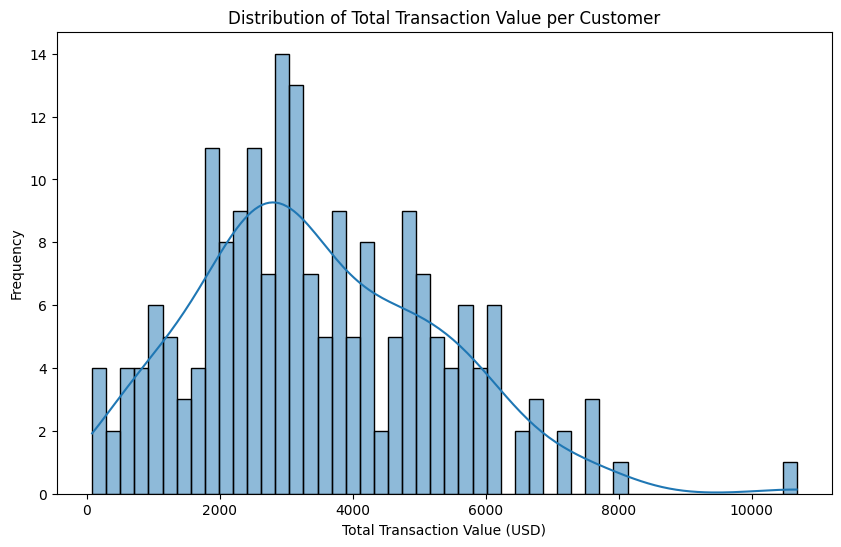

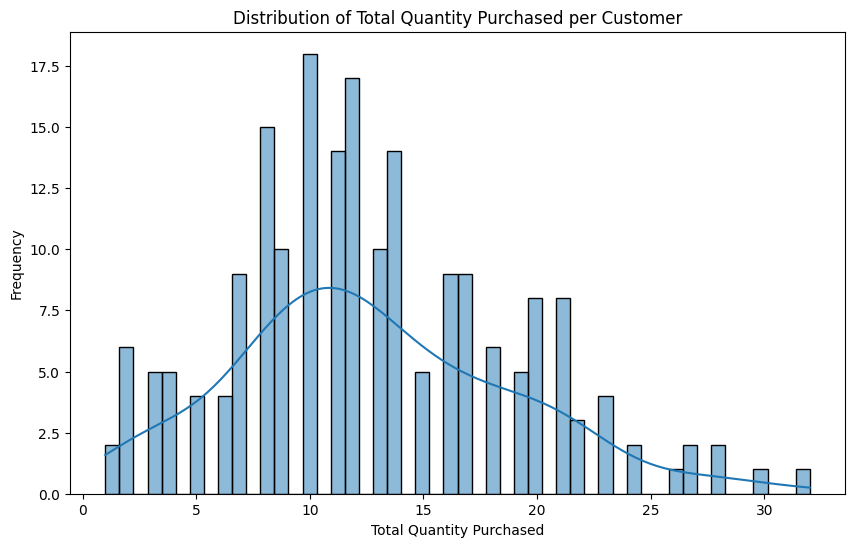

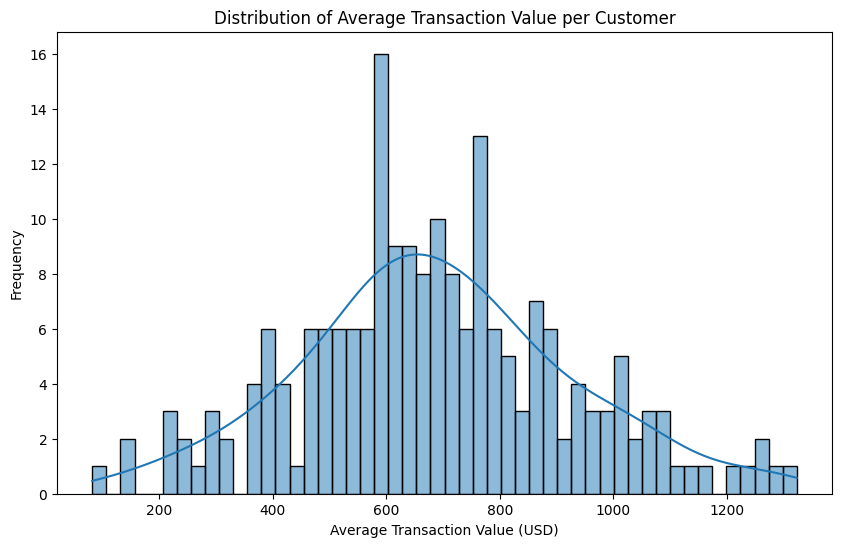

    CustomerID          CustomerName         Region  TotalValue
140      C0141          Paul Parsons         Europe    10673.87
53       C0054          Bruce Rhodes           Asia     8040.39
64       C0065          Gerald Hines  North America     7663.70
155      C0156         William Adams  North America     7634.45
81       C0082          Aimee Taylor  South America     7572.91
186      C0188             Anna Ball  South America     7111.32
58       C0059  Mrs. Kimberly Wright  North America     7073.28
27       C0028         Jennifer Pena           Asia     6819.57
98       C0099          Rodney Eaton  South America     6715.72
164      C0165         Juan Mcdaniel  South America     6708.10
    CustomerID     CustomerName         Region  Quantity
108      C0109    Abigail Jones  North America        32
164      C0165    Juan Mcdaniel  South America        30
155      C0156    William Adams  North America        28
74       C0075    Misty Higgins         Europe        28
64       C0

In [19]:
# Customer Analysis

# Analyze customer demographics
plt.figure(figsize=(10, 6))
sns.countplot(data=customers_df, x='Region', order=customers_df['Region'].value_counts().index)
plt.title('Customer Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.show()

# Analyze customer signup trends over time
customers_df.set_index('SignupDate', inplace=True)
customers_df.resample('M').count()['CustomerID'].plot(figsize=(12, 6))
plt.title('Monthly Customer Signups Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Signups')
plt.show()

# Analyze customer transaction behavior
customer_transactions = transactions_df.groupby('CustomerID').agg({
    'TransactionID': 'count',
    'TotalValue': 'sum',
    'Quantity': 'sum'
}).reset_index()
print(transactions_df.columns)
# Merge with customer data
customer_analysis_df = customers_df.merge(customer_transactions, on='CustomerID')

# Distribution of total transaction value per customer
plt.figure(figsize=(10, 6))
sns.histplot(customer_analysis_df['TotalValue'], bins=50, kde=True)
plt.title('Distribution of Total Transaction Value per Customer')
plt.xlabel('Total Transaction Value (USD)')
plt.ylabel('Frequency')
plt.show()

# Distribution of total quantity purchased per customer
plt.figure(figsize=(10, 6))
sns.histplot(customer_analysis_df['Quantity'], bins=50, kde=True)
plt.title('Distribution of Total Quantity Purchased per Customer')
plt.xlabel('Total Quantity Purchased')
plt.ylabel('Frequency')
plt.show()

# Average transaction value per customer
customer_analysis_df['AvgTransactionValue'] = customer_analysis_df['TotalValue'] / customer_analysis_df['TransactionID']

plt.figure(figsize=(10, 6))
sns.histplot(customer_analysis_df['AvgTransactionValue'], bins=50, kde=True)
plt.title('Distribution of Average Transaction Value per Customer')
plt.xlabel('Average Transaction Value (USD)')
plt.ylabel('Frequency')
plt.show()

# Top 10 customers by total transaction value
top_customers = customer_analysis_df.sort_values(by='TotalValue', ascending=False).head(10)
print(top_customers[['CustomerID', 'CustomerName', 'Region', 'TotalValue']])

# Top 10 customers by total quantity purchased
top_customers_quantity = customer_analysis_df.sort_values(by='Quantity', ascending=False).head(10)
print(top_customers_quantity[['CustomerID', 'CustomerName', 'Region', 'Quantity']])

# Product Analysis
Analyze product data to understand product categories, pricing, and sales.

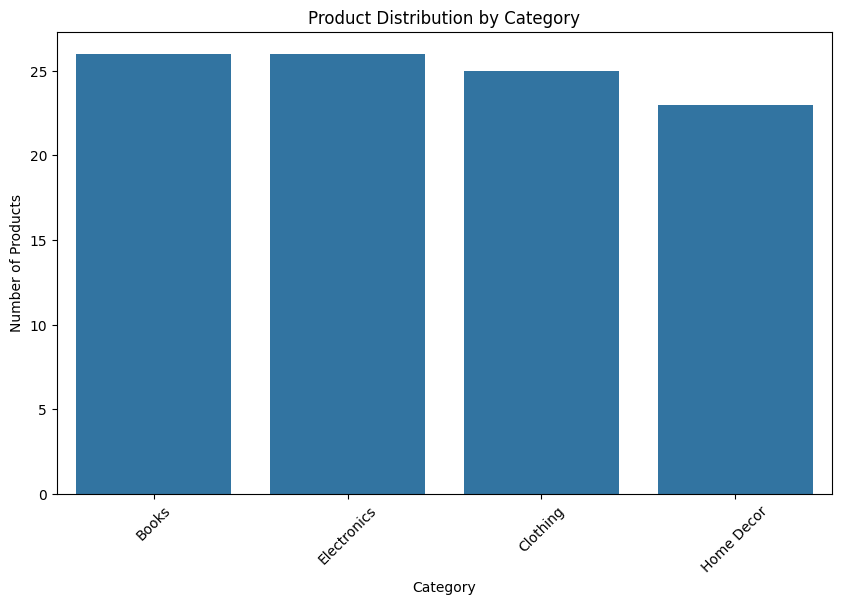

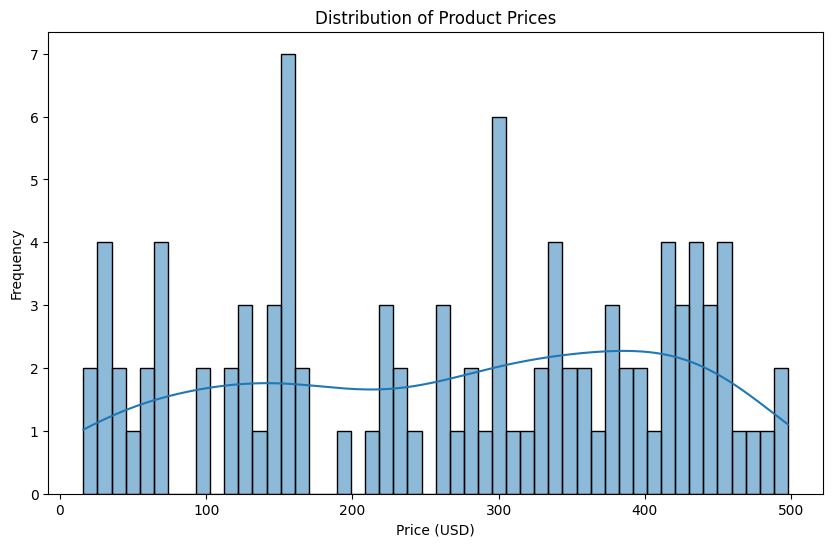

   ProductID               ProductName     Category   Price
74      P075          TechPro Textbook        Books  497.76
31      P032        BookWorld Cookbook        Books  488.63
44      P045         SoundWave T-Shirt     Clothing  481.78
16      P017       ActiveWear Textbook        Books  469.77
36      P037      SoundWave Smartwatch  Electronics  459.86
40      P041  ComfortLiving Smartphone  Electronics  456.28
82      P083     ActiveWear Smartwatch  Electronics  455.72
22      P023   ActiveWear Cookware Set   Home Decor  454.53
63      P064   HomeSense Running Shoes     Clothing  452.42
93      P094    HomeSense Cookware Set   Home Decor  447.34
  ProductID            ProductName     Category  Quantity
0      P059        SoundWave Jeans     Clothing        46
1      P054     SoundWave Cookbook        Books        46
2      P029     TechPro Headphones  Electronics        45
3      P079         ActiveWear Rug   Home Decor        43
4      P061    HomeSense Desk Lamp   Home Decor   

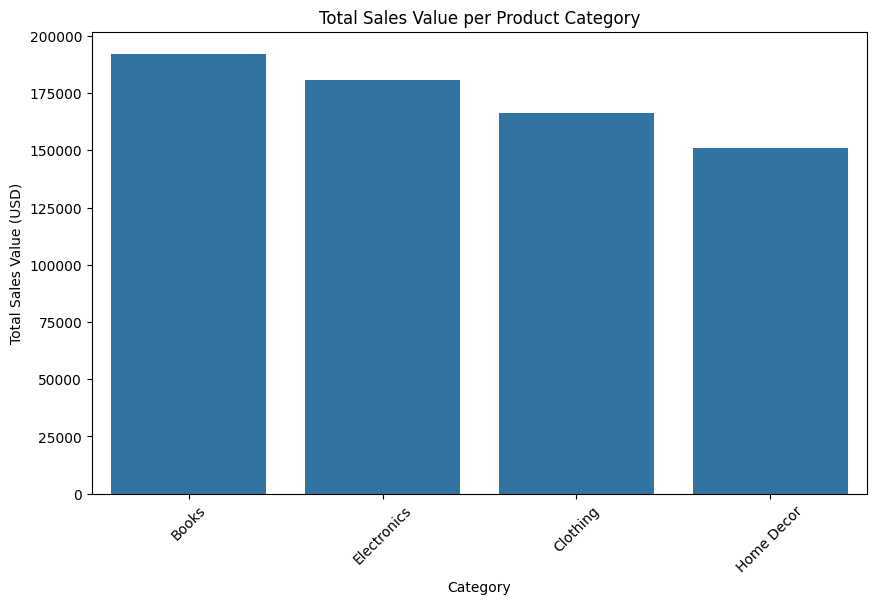

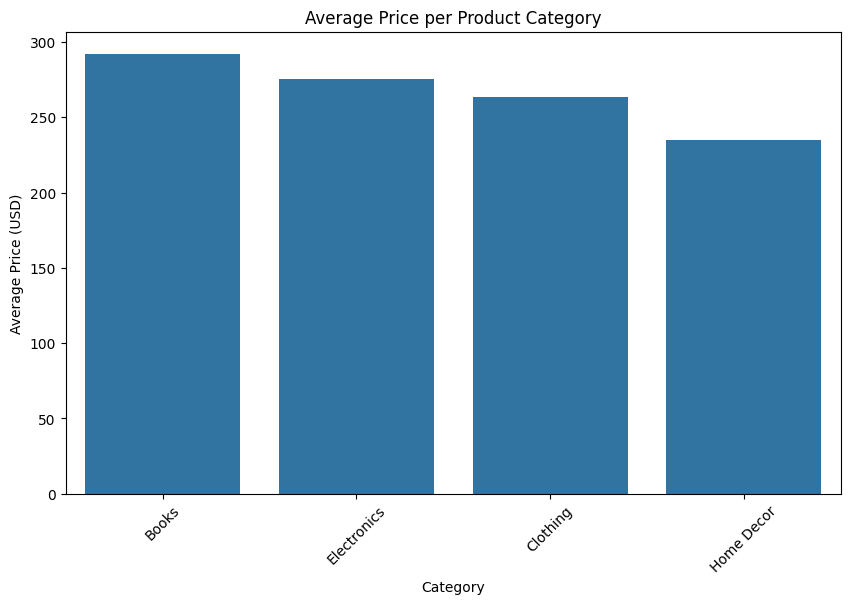

In [20]:
# Product Analysis

# Analyze product categories
plt.figure(figsize=(10, 6))
sns.countplot(data=products_df, x='Category', order=products_df['Category'].value_counts().index)
plt.title('Product Distribution by Category')
plt.xlabel('Category')
plt.ylabel('Number of Products')
plt.xticks(rotation=45)
plt.show()

# Analyze product pricing
plt.figure(figsize=(10, 6))
sns.histplot(products_df['Price'], bins=50, kde=True)
plt.title('Distribution of Product Prices')
plt.xlabel('Price (USD)')
plt.ylabel('Frequency')
plt.show()

# Top 10 most expensive products
top_expensive_products = products_df.sort_values(by='Price', ascending=False).head(10)
print(top_expensive_products[['ProductID', 'ProductName', 'Category', 'Price']])

# Top 10 best-selling products by quantity
top_selling_products = merged_df.groupby('ProductID')['Quantity'].sum().sort_values(ascending=False).head(10)
top_selling_products = top_selling_products.reset_index().merge(products_df, on='ProductID')
print(top_selling_products[['ProductID', 'ProductName', 'Category', 'Quantity']])

# Top 10 products by total sales value
top_sales_value_products = merged_df.groupby('ProductID')['TotalValue'].sum().sort_values(ascending=False).head(10)
top_sales_value_products = top_sales_value_products.reset_index().merge(products_df, on='ProductID')
print(top_sales_value_products[['ProductID', 'ProductName', 'Category', 'TotalValue']])

# Average price per product category
avg_price_per_category = products_df.groupby('Category')['Price'].mean().sort_values(ascending=False)
print(avg_price_per_category)

# Total sales value per product category
total_sales_per_category = merged_df.groupby('Category')['TotalValue'].sum().sort_values(ascending=False)
print(total_sales_per_category)

# Visualize total sales value per product category
plt.figure(figsize=(10, 6))
sns.barplot(x=total_sales_per_category.index, y=total_sales_per_category.values)
plt.title('Total Sales Value per Product Category')
plt.xlabel('Category')
plt.ylabel('Total Sales Value (USD)')
plt.xticks(rotation=45)
plt.show()

# Visualize average price per product category
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_price_per_category.index, y=avg_price_per_category.values)
plt.title('Average Price per Product Category')
plt.xlabel('Category')
plt.ylabel('Average Price (USD)')
plt.xticks(rotation=45)
plt.show()

# Transaction Analysis
Analyze transaction data to understand sales trends, quantities, and total values.

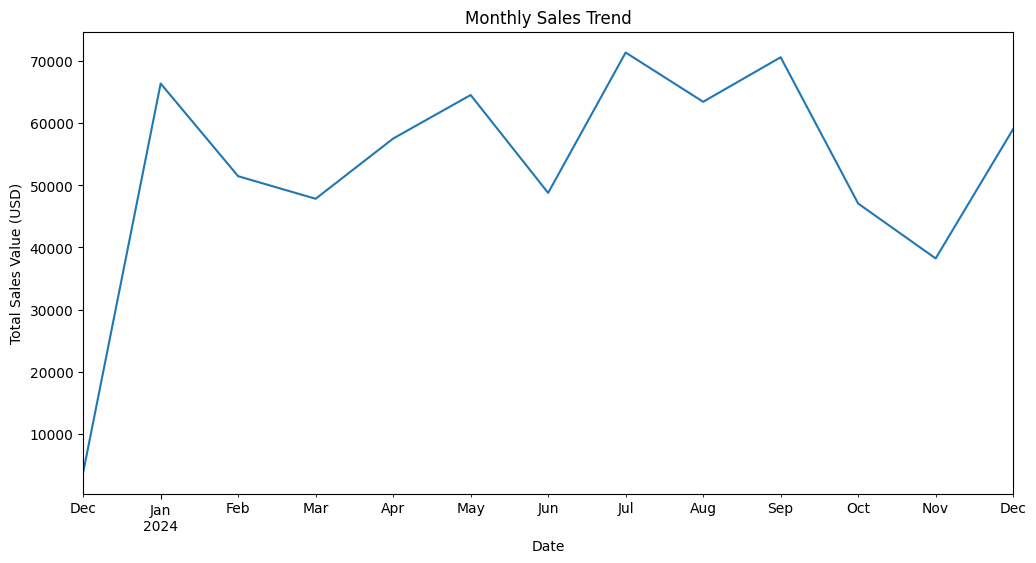

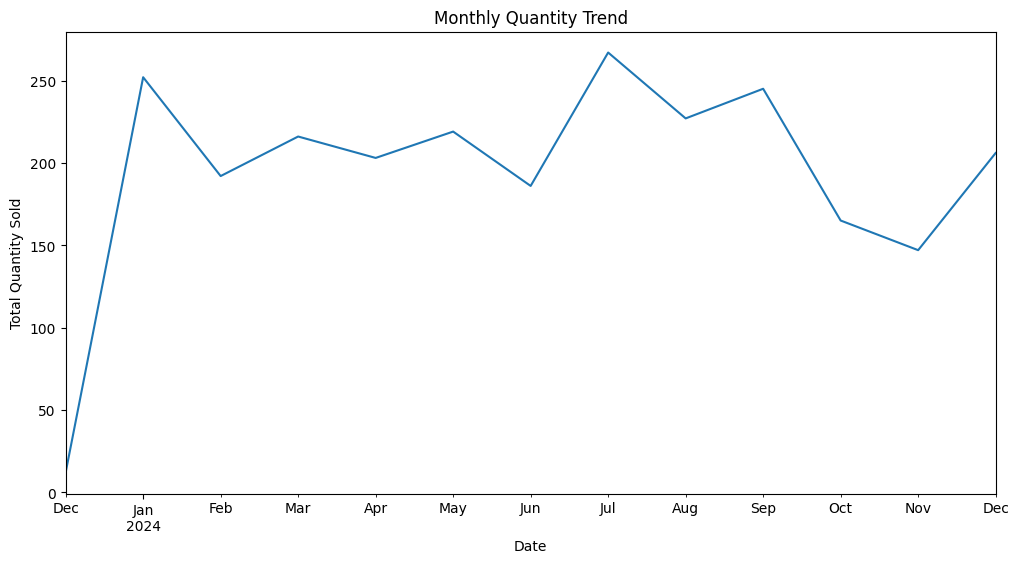

                    TransactionID CustomerID ProductID  Quantity  TotalValue  \
TransactionDate                                                                
2024-09-06 18:39:07        T00928      C0082      P075         4     1991.04   
2024-07-18 02:51:22        T00499      C0065      P032         4     1954.52   
2024-05-30 18:15:28        T00307      C0044      P045         4     1927.12   
2024-07-06 23:53:24        T00224      C0171      P017         4     1879.08   
2024-07-26 00:21:59        T00503      C0013      P017         4     1879.08   
2024-11-29 23:39:00        T00558      C0169      P017         4     1879.08   
2024-12-11 13:46:30        T00070      C0051      P017         4     1879.08   
2024-04-05 13:05:32        T00922      C0018      P037         4     1839.44   
2024-06-04 02:02:24        T00482      C0066      P041         4     1825.12   
2024-01-09 11:00:50        T00034      C0168      P041         4     1825.12   

                      Price  
Transacti

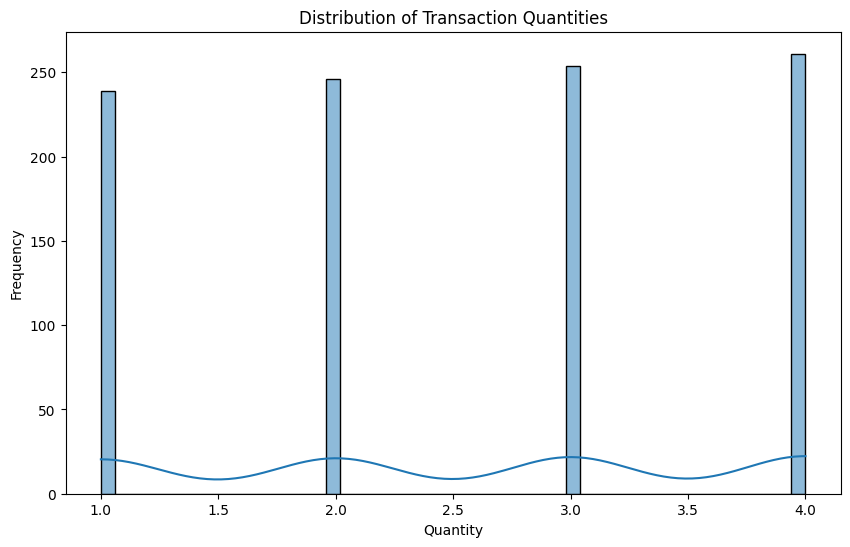

In [21]:
# Transaction Analysis



# Monthly sales trend
monthly_sales = transactions_df.resample('M').sum()['TotalValue']
plt.figure(figsize=(12, 6))
monthly_sales.plot()
plt.title('Monthly Sales Trend')
plt.xlabel('Date')
plt.ylabel('Total Sales Value (USD)')
plt.show()

# Monthly quantity trend
monthly_quantity = transactions_df.resample('M').sum()['Quantity']
plt.figure(figsize=(12, 6))
monthly_quantity.plot()
plt.title('Monthly Quantity Trend')
plt.xlabel('Date')
plt.ylabel('Total Quantity Sold')
plt.show()


# Top 10 transactions by total value
top_transactions = transactions_df.sort_values(by='TotalValue', ascending=False).head(10)
print(top_transactions)

# Distribution of transaction quantities
plt.figure(figsize=(10, 6))
sns.histplot(transactions_df['Quantity'], bins=50, kde=True)
plt.title('Distribution of Transaction Quantities')
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.show()

# Business Insights
Derive at least 5 business insights from the EDA and write them in short point-wise sentences.

In [22]:
# Business Insights


north_america_customers = customers_df[customers_df['Region'] == 'North America'].shape[0]
europe_customers = customers_df[customers_df['Region'] == 'Europe'].shape[0]
total_customers = customers_df.shape[0]
print(f"North America Customers: {north_america_customers}, Europe Customers: {europe_customers}, Total Customers: {total_customers}")

electronics_products = products_df[products_df['Category'] == 'Electronics'].shape[0]
total_products = products_df.shape[0]
print(f"Electronics Products: {electronics_products}, Total Products: {total_products}")

avg_transaction_value_na = merged_df[merged_df['Region'] == 'North America']['TotalValue'].mean()
avg_transaction_value_other = merged_df[merged_df['Region'] != 'North America']['TotalValue'].mean()
print(f"Average Transaction Value (North America): {avg_transaction_value_na}, Average Transaction Value (Other Regions): {avg_transaction_value_other}")

top_10_customers_sales = top_customers['TotalValue'].sum()
total_sales = merged_df['TotalValue'].sum()
print(f"Top 10 Customers Sales: {top_10_customers_sales}, Total Sales: {total_sales}")

most_expensive_product_ids = top_expensive_products['ProductID'].tolist()
best_selling_product_ids = top_selling_products['ProductID'].tolist()
common_products = set(most_expensive_product_ids).intersection(best_selling_product_ids)
print(f"Common Products in Most Expensive and Best-Selling: {common_products}")

North America Customers: 46, Europe Customers: 50, Total Customers: 200
Electronics Products: 26, Total Products: 100
Average Transaction Value (North America): 624.2352459016395, Average Transaction Value (Other Regions): 711.2197883597883
Top 10 Customers Sales: 76013.31, Total Sales: 689995.56
Common Products in Most Expensive and Best-Selling: set()


# Observations

Insight 1: The majority of customers are from North America and Europe, indicating a strong market presence in these regions.

Insight 2: The Electronics category has the highest number of products, suggesting a diverse product range in this category.

Insight 3: The average transaction value is higher in North America compared to other regions, indicating higher spending power.

Insight 4: The top 10 customers contribute to a significant portion of the total sales, highlighting the importance of key customers.

Insight 5: The most expensive products are not necessarily the best-selling ones, indicating that price is not the only factor driving sales.




